In [69]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
%matplotlib inline

In [219]:
pts=100 
x=np.linspace(-5,5,num=pts)
yactual_1 = np.sin(x * 0.5*np.pi) #+ 0.5* np.sin(x+3)
yactual_2 = -(0.5 * x-2)**2
yactual_3 = -(0.5* x+2)**2
yactual_4 = yactual_1 + yactual_2 + yactual_3

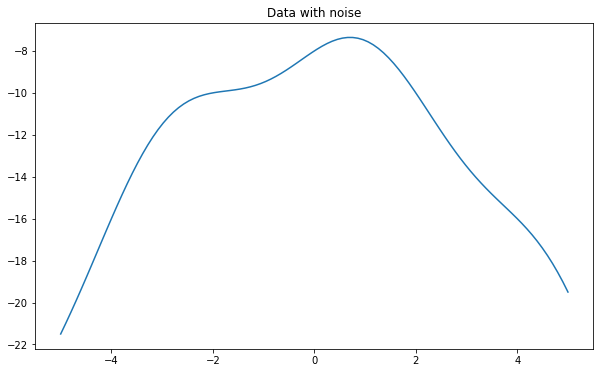

In [220]:
pyplot.figure(figsize=(10,6))
pyplot.plot(x, yactual_4)
pyplot.title("Data with noise")

In [228]:
dy = np.diff(yactual_4)
dydy = np.diff(dy)

x_list = []
y_list = []
dy_list = []
dydy_list = []

for i in range(0, len(yactual)-2):
    x_list.append(x[i+2])
    y_list.append(yactual[i+2])
    dy_list.append(dy[i+1])
    dydy_list.append(dydy[i])
    
all_lists = pd.DataFrame(
    {'x':x_list,
     'y': y_list,
     'dy': dy_list,
     'dydy': dydy_list}
)

for i in range(0, len(all_lists)-1):

    #first_derivative = all_lists.iloc[i]['dy'] <= 0 <= all_lists.iloc[i+1]['dy'] or all_lists.iloc[i]['dy'] >= 0 >= all_lists.iloc[i+1]['dy']
    second_derivative = all_lists.iloc[i]['dydy'] <= 0 <= all_lists.iloc[i+1]['dydy']
    
#     if first_derivative:
#         print '\nfirst derivative'
#         print all_lists.iloc[i]['dy']
#         print all_lists.iloc[i+1]['dy']  
#         print 'x value: ' + str(all_lists.iloc[i]['x'])
        
    if second_derivative:
        print '\nsecond derivative'
        print all_lists.iloc[i]['dydy']
        print all_lists.iloc[i+1]['dydy']  
        print 'x value: ' + str(all_lists.iloc[i]['x'])

#     if first_derivative and second_derivative:
#         print '\nboth first and second'
#         print all_lists.iloc[i]['dydy']
#         print all_lists.iloc[i+1]['dydy']  
#         print 'x value: ' + str(all_lists.iloc[i]['x'])


second derivative
-0.001237265387512565
0.002358070817532365
x value: -1.6666666666666665

second derivative
-0.0035086260289016735
0.00023310794155939618
x value: 2.2727272727272725


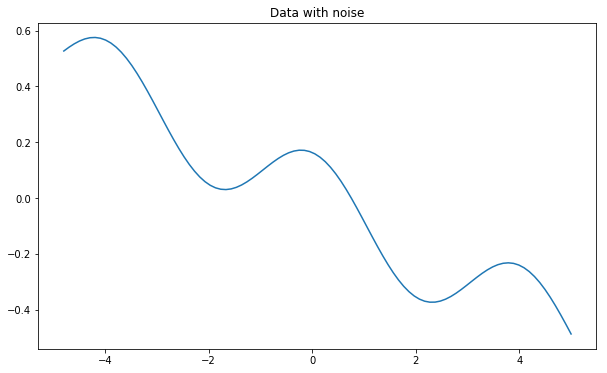

In [229]:
pyplot.figure(figsize=(10,6))
pyplot.plot(all_lists['x'], all_lists['dy'])
pyplot.title("Data with noise")

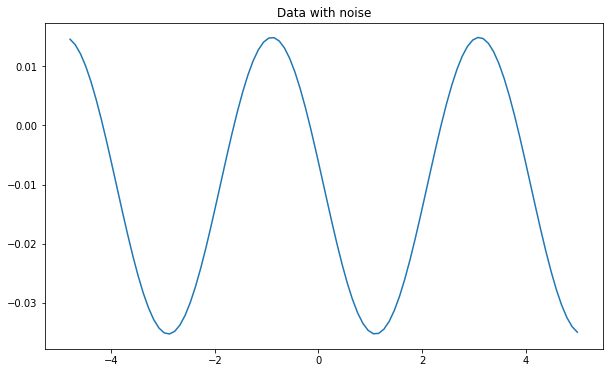

In [230]:
pyplot.figure(figsize=(10,6))
pyplot.plot(all_lists['x'], all_lists['dydy'])
pyplot.title("Data with noise")

In [231]:
all_lists

,dy,dydy,x,y
0,0.527114,0.014604,-4.797980,0.996339
1,0.540779,0.013665,-4.696970,0.999881
2,0.552905,0.012126,-4.595960,0.993230
3,0.562932,0.010027,-4.494949,0.976453
4,0.570352,0.007420,-4.393939,0.949722
5,0.574721,0.004369,-4.292929,0.913309
6,0.575674,0.000953,-4.191919,0.867586
7,0.572930,-0.002744,-4.090909,0.813018
8,0.566302,-0.006628,-3.989899,0.750162
9,0.555701,-0.010602,-3.888889,0.679658


In [16]:
from scipy.signal import savgol_filter
savgol_filter()